In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_1000_posix = pd.read_csv('./results_1000_posix.csv')
df_1000_open_mp_static = pd.read_csv('./results_1000_openmp_static.csv')
df_1000_posix.head()

,num_threads,run,real_time
0,1,1,6.06
1,1,2,6.04
2,1,3,5.92
3,1,4,6.06
4,1,5,6.19


In [10]:
df_1000_open_mp_static.head()



,num_threads,run,real_time
0,1,1,2.60
1,1,2,2.64
2,1,3,2.67
3,1,4,2.61
4,1,5,2.55


In [12]:
# Compute grouped statistics
grouped_1000_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_posix

,num_threads,mean,std
0,1,6.085,0.229843
1,2,5.002,0.740627
2,3,4.434,0.430535
3,4,4.380,0.707358
4,5,5.537,0.368059
5,6,5.487,0.759357
6,7,5.849,1.066244
7,8,6.139,1.259828
8,9,6.731,1.730700
9,10,5.759,0.958465


In [14]:

grouped_1000_open_mp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_open_mp

,num_threads,mean,std
0,1,2.584,0.048580
1,2,3.517,0.911617
2,3,2.645,0.154434
3,4,2.885,0.307002
4,5,3.246,0.600540
5,6,3.438,0.381249
6,7,2.826,0.189631
7,8,2.957,0.193509
8,9,2.906,0.148937
9,10,2.861,0.253747


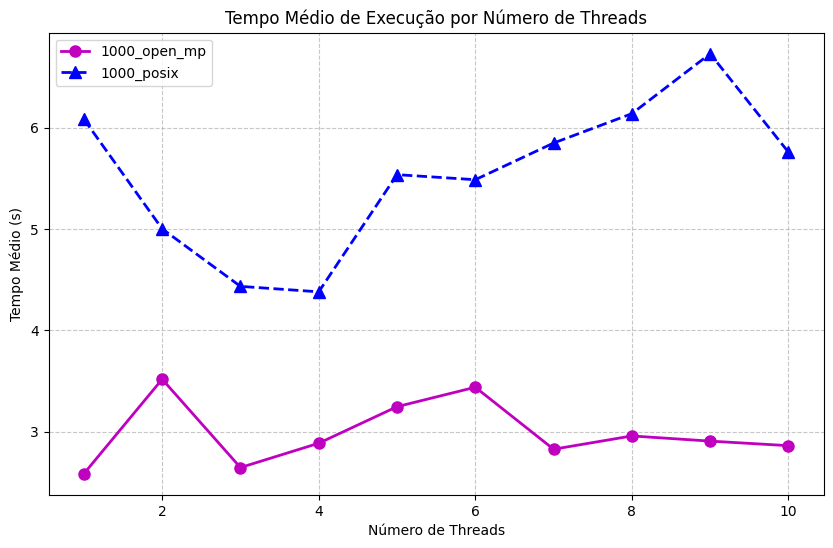

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_1000_open_mp['num_threads'], grouped_1000_open_mp['mean'],
         'mo-', linewidth=2, markersize=8, label='1000_open_mp')
plt.plot(grouped_1000_posix['num_threads'], grouped_1000_posix['mean'],
         'b--', marker='^', linewidth=2, markersize=8, label='1000_posix')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Tempo Médio de Execução por Número de Threads')
plt.grid(True, linestyle='--', alpha=0.7)


In [21]:
## now compute the speedup 

# Calculate speedup for each matrix size
speedup_1500_transposta = grouped_1000_posix['mean'].iloc[0] / grouped_1000_posix['mean']
speedup_1500 = grouped_1000_open_mp['mean'].iloc[0] / grouped_1000_open_mp['mean']

# Create speedup dataframe
speedup_df = pd.DataFrame({
    'num_threads': grouped_1000_open_mp['num_threads'],
})

# and plot the speedup

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500'], 'mo-', linewidth=2, markersize=8, label='1500x1500')
plt.plot(speedup_df['num_threads'], speedup_df['1500x1500_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='1500x1500 Transposta')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1500x1500')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()





KeyError: '1500x1500'

<Figure size 2000x1000 with 0 Axes>

In [ ]:
## for 1000x1000

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000'], 'mo-', linewidth=2, markersize=8, label='1000x1000')
plt.plot(speedup_df['num_threads'], speedup_df['1000x1000_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='1000x1000 Transposta')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 1000x1000')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()


In [ ]:
# for 400x400

plt.figure(figsize=(20, 10))
plt.plot(speedup_df['num_threads'], speedup_df['400x400'], 'mo-', linewidth=2, markersize=8, label='400x400')
plt.plot(speedup_df['num_threads'], speedup_df['400x400_transposta'], 'b--', marker='^', linewidth=2, markersize=8, label='400x400 Transposta')
plt.legend()
plt.xlabel('Número de Threads') 
plt.ylabel('Speedup')
plt.title('Speedup por Número de Threads para matrizes 400x400')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(speedup_df['num_threads'])
plt.ylim(bottom=0)  # Faz o eixo y começar em zero
plt.show()


In [ ]:
# Criar um resumo lado a lado com a média para cada método por número de threads
summary_df = pd.DataFrame()

# Calcular médias para cada tamanho de matriz e método
df_400.groupby('num_threads')['real_time'].mean()

# Calcular médias de speedup para cada tamanho de matriz e método
summary_df = pd.DataFrame()

# Para matrizes 400x400
summary_df['400x400'] = df_400.groupby('num_threads')['real_time'].mean()
summary_df['400x400_transposta'] = df_400_transposta.groupby('num_threads')['real_time'].mean()

# Para matrizes 1000x1000
summary_df['1000x1000'] = df_1000.groupby('num_threads')['real_time'].mean()
summary_df['1000x1000_transposta'] = df_1000_transposta.groupby('num_threads')['real_time'].mean()

# Para matrizes 1500x1500
summary_df['1500x1500'] = df_1000_open_mp_static.groupby('num_threads')['real_time'].mean()
summary_df['1500x1500_transposta'] = df_1000_posix.groupby('num_threads')['real_time'].mean()

# Calcular speedup (dividir pelo tempo com 1 thread)
for col in summary_df.columns:
    base_time = summary_df[col].iloc[0]  # Tempo com 1 thread
    summary_df[f'{col}_speedup'] = base_time / summary_df[col]

# Exibir resultados
print("\nMédias de Speedup:")
print(summary_df.filter(like='_speedup'))


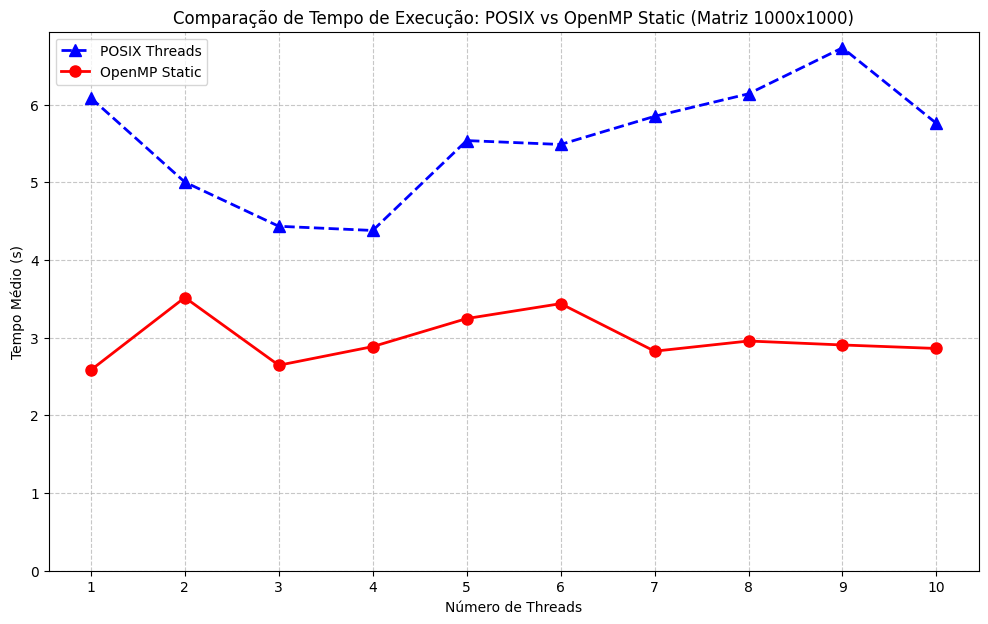

In [20]:
# Comparison graph between POSIX and OpenMP Static implementations for 1000x1000 matrices
# Compute grouped statistics for both implementations
grouped_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_openmp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

# Create the comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], grouped_posix['mean'], 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], grouped_openmp['mean'], 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Comparação de Tempo de Execução: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


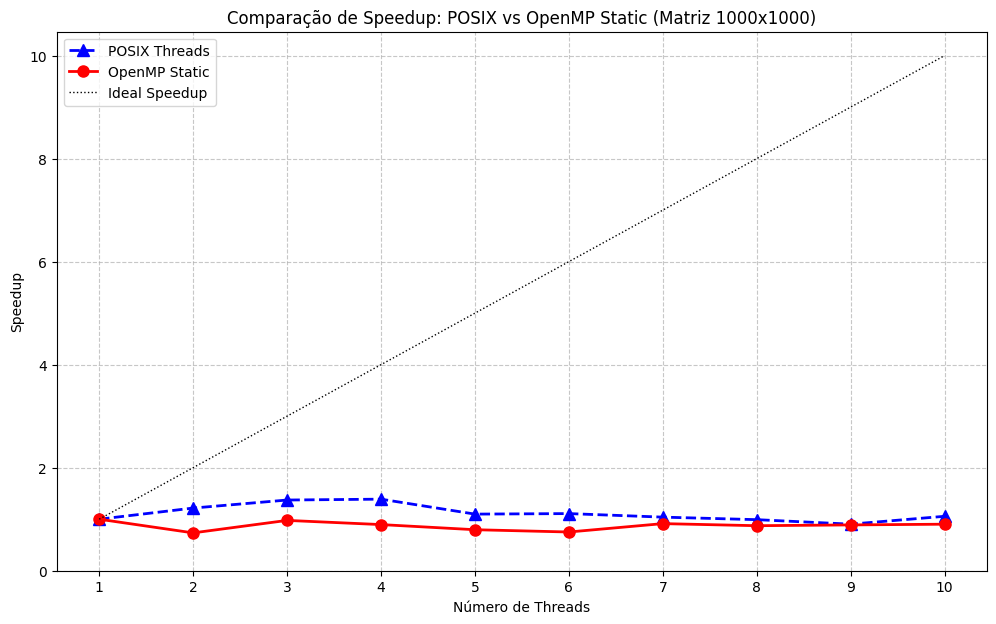

In [22]:
# Speedup comparison graph between POSIX and OpenMP Static implementations
# Calculate speedup for each implementation
speedup_posix = grouped_posix['mean'].iloc[0] / grouped_posix['mean']
speedup_openmp = grouped_openmp['mean'].iloc[0] / grouped_openmp['mean']

# Create the speedup comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], speedup_posix, 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], speedup_openmp, 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.plot(grouped_posix['num_threads'], grouped_posix['num_threads'], 'k:', linewidth=1, label='Ideal Speedup')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Comparação de Speedup: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


In [18]:
# Summary of comparison between POSIX and OpenMP Static implementations
# Calculate efficiency (speedup / number of threads) for each implementation
efficiency_posix = speedup_posix / grouped_posix['num_threads']
efficiency_openmp = speedup_openmp / grouped_openmp['num_threads']

# Create a summary dataframe
comparison_summary = pd.DataFrame({
    'num_threads': grouped_posix['num_threads'],
    'posix_time': grouped_posix['mean'],
    'openmp_time': grouped_openmp['mean'],
    'posix_speedup': speedup_posix,
    'openmp_speedup': speedup_openmp,
    'posix_efficiency': efficiency_posix,
    'openmp_efficiency': efficiency_openmp,
    'time_ratio': grouped_posix['mean'] / grouped_openmp['mean']
})

# Display the summary
print("Comparação entre implementações POSIX e OpenMP Static para matriz 1000x1000:")
print(comparison_summary)

# Calculate and display average metrics
print("\nMétricas médias (excluindo execução com 1 thread):")
avg_metrics = comparison_summary[comparison_summary['num_threads'] > 1].mean()
print(f"Tempo médio POSIX: {avg_metrics['posix_time']:.2f} segundos")
print(f"Tempo médio OpenMP: {avg_metrics['openmp_time']:.2f} segundos")
print(f"Speedup médio POSIX: {avg_metrics['posix_speedup']:.2f}x")
print(f"Speedup médio OpenMP: {avg_metrics['openmp_speedup']:.2f}x")
print(f"Eficiência média POSIX: {avg_metrics['posix_efficiency']:.2f} (ideal = 1.0)")
print(f"Eficiência média OpenMP: {avg_metrics['openmp_efficiency']:.2f} (ideal = 1.0)")
print(f"Razão média de tempo (POSIX/OpenMP): {avg_metrics['time_ratio']:.2f}x")


NameError: name 'speedup_posix' is not defined